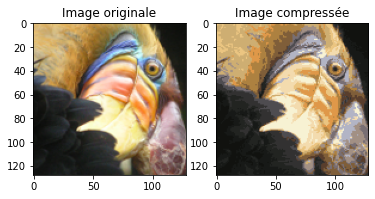

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    m = X.shape[0]
    idx = np.zeros(m, dtype=int)
    for i in range(m):
        dists = np.sum((X[i, :] - centroids) ** 2, axis=1)
        idx[i] = np.argmin(dists)
    return idx

def compute_centroids(X, idx, K):
    n = X.shape[1]
    centroids = np.zeros((K, n))
    for i in range(K):
        centroids[i, :] = np.mean(X[idx == i, :], axis=0)
    return centroids

def run_kmeans(X, initial_centroids, max_iters):
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

def compress_image(img, K):
    nrows, ncols, ndims = img.shape
    X = img.reshape(nrows * ncols, ndims)
    initial_centroids = X[np.random.choice(X.shape[0], K, replace=False), :]
    centroids, idx = run_kmeans(X, initial_centroids, max_iters=10)
    compressed_img = centroids[idx, :].reshape(nrows, ncols, ndims)
    return compressed_img

# charger l'image
img = plt.imread('bird_small.png')

# compresser l'image avec K = 16
compressed_img = compress_image(img, K=16)

# afficher l'image originale et l'image compressée
plt.subplot(121)
plt.imshow(img)
plt.title('Image originale')
plt.subplot(122)
plt.imshow(compressed_img)
plt.title('Image compressée')
plt.show()
